In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sage.all_cmdline import *

from ctmc.metrics import *
from ctmc.generator import *

In [43]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'roboto'

In [3]:
from ctmc.model import *

In [4]:
par = {k: 100, gamm: 0.00083, beta: 0.314, omegaA: 60, omegaB: 40}
rp = {pA: 0.5, pB: 0.5, pAB: 0.33, pBA: 0.33}

In [16]:
fake_pi = vector(var("π1 π2 π3 π4 π5 π6 π7 π8 π9"))

In [6]:
pi.subs(par)

(0.45730066177094353, 0.19904063213177775, 0.14447224318265123, 0.09409979741795954, 0.028123225521950443, 0.057124387861918105, 0.014593817040464958, 0.003849743350723288, 0.0013954917216113158)

In [7]:
(mining_throughput(pi) == total_throughput(pi)).subs(par)

0.0932603676567176 == 0.09326036765671761

In [17]:
mining_throughput(fake_pi) == total_throughput(fake_pi)

k*γ*(π1 + π3 + π4 + π6) + 2*γ*(π3 + π6 + π8)*ωA + 2*γ*(π4 + π6 + π9)*ωB + γ*π2 == -((pA - 1)*π3 + (pB - 1)*π4 + (pAB + pBA - 1)*π6)*k*γ + (pA*π3 + pAB*π6)*k*γ + (pB*π4 + pBA*π6)*k*γ + k*γ*π1 + 2*γ*(π3 + π6 + π8)*ωA + 2*γ*(π4 + π6 + π9)*ωB + γ*π2

In [9]:
print(poolA_throughput(fake_pi))
print(poolB_throughput(fake_pi))
print(fair_throughput(fake_pi))

(pA*π3 + pAB*π6)*k*γ + 2*γ*(π3 + π6 + π8)*ωA
(pB*π4 + pBA*π6)*k*γ + 2*γ*(π4 + π6 + π9)*ωB
-((pA - 1)*π3 + (pB - 1)*π4 + (pAB + pBA - 1)*π6)*k*γ + k*γ*π1 + γ*π2


In [10]:
pi.subs(par | {omegaA: 100, omegaB: 0})

(0.47596397318210937, 0.19467168133792162, 0.26050479718062997, 1.1547053248068776e-16, 0.056952584739244555, 5.773526624034388e-17, 0, 0.01190696356009395, 6.104493118405786e-17)

In [22]:
revenue_msA = poolA_revenue(pi) / omegaA
revenue_msB = poolB_revenue(pi) / omegaB
revenue_mF = fair_revenue(pi) / k

In [67]:
tot = 200
v = var('v')
s = par | rp | {omegaA: v * tot,
                omegaB: v / 1.5 * tot,
                k: (1 - v * 1.66) * tot}
f_sa = revenue_msA.subs(s)
f_sb = revenue_msB.subs(s)
f_f = revenue_mF.subs(s)
s_og = s | {omegaB: 0, k: (1-v)*tot}
f_sa_og = revenue_msA.subs(s_og)
f_f_og = revenue_mF.subs(s_og)

x_values = np.linspace(0.01, 0.5, 10)
y_values_sa = np.array([f_sa.subs({v: x}) for x in x_values])
y_values_sb = np.array([f_sb.subs({v: x}) for x in x_values])
y_values_f = np.array([f_f.subs({v: x}) for x in x_values])
y_values_sa_og = np.array([f_sa_og.subs({v: x}) for x in x_values])
y_values_f_og = np.array([f_f_og.subs({v: x}) for x in x_values])

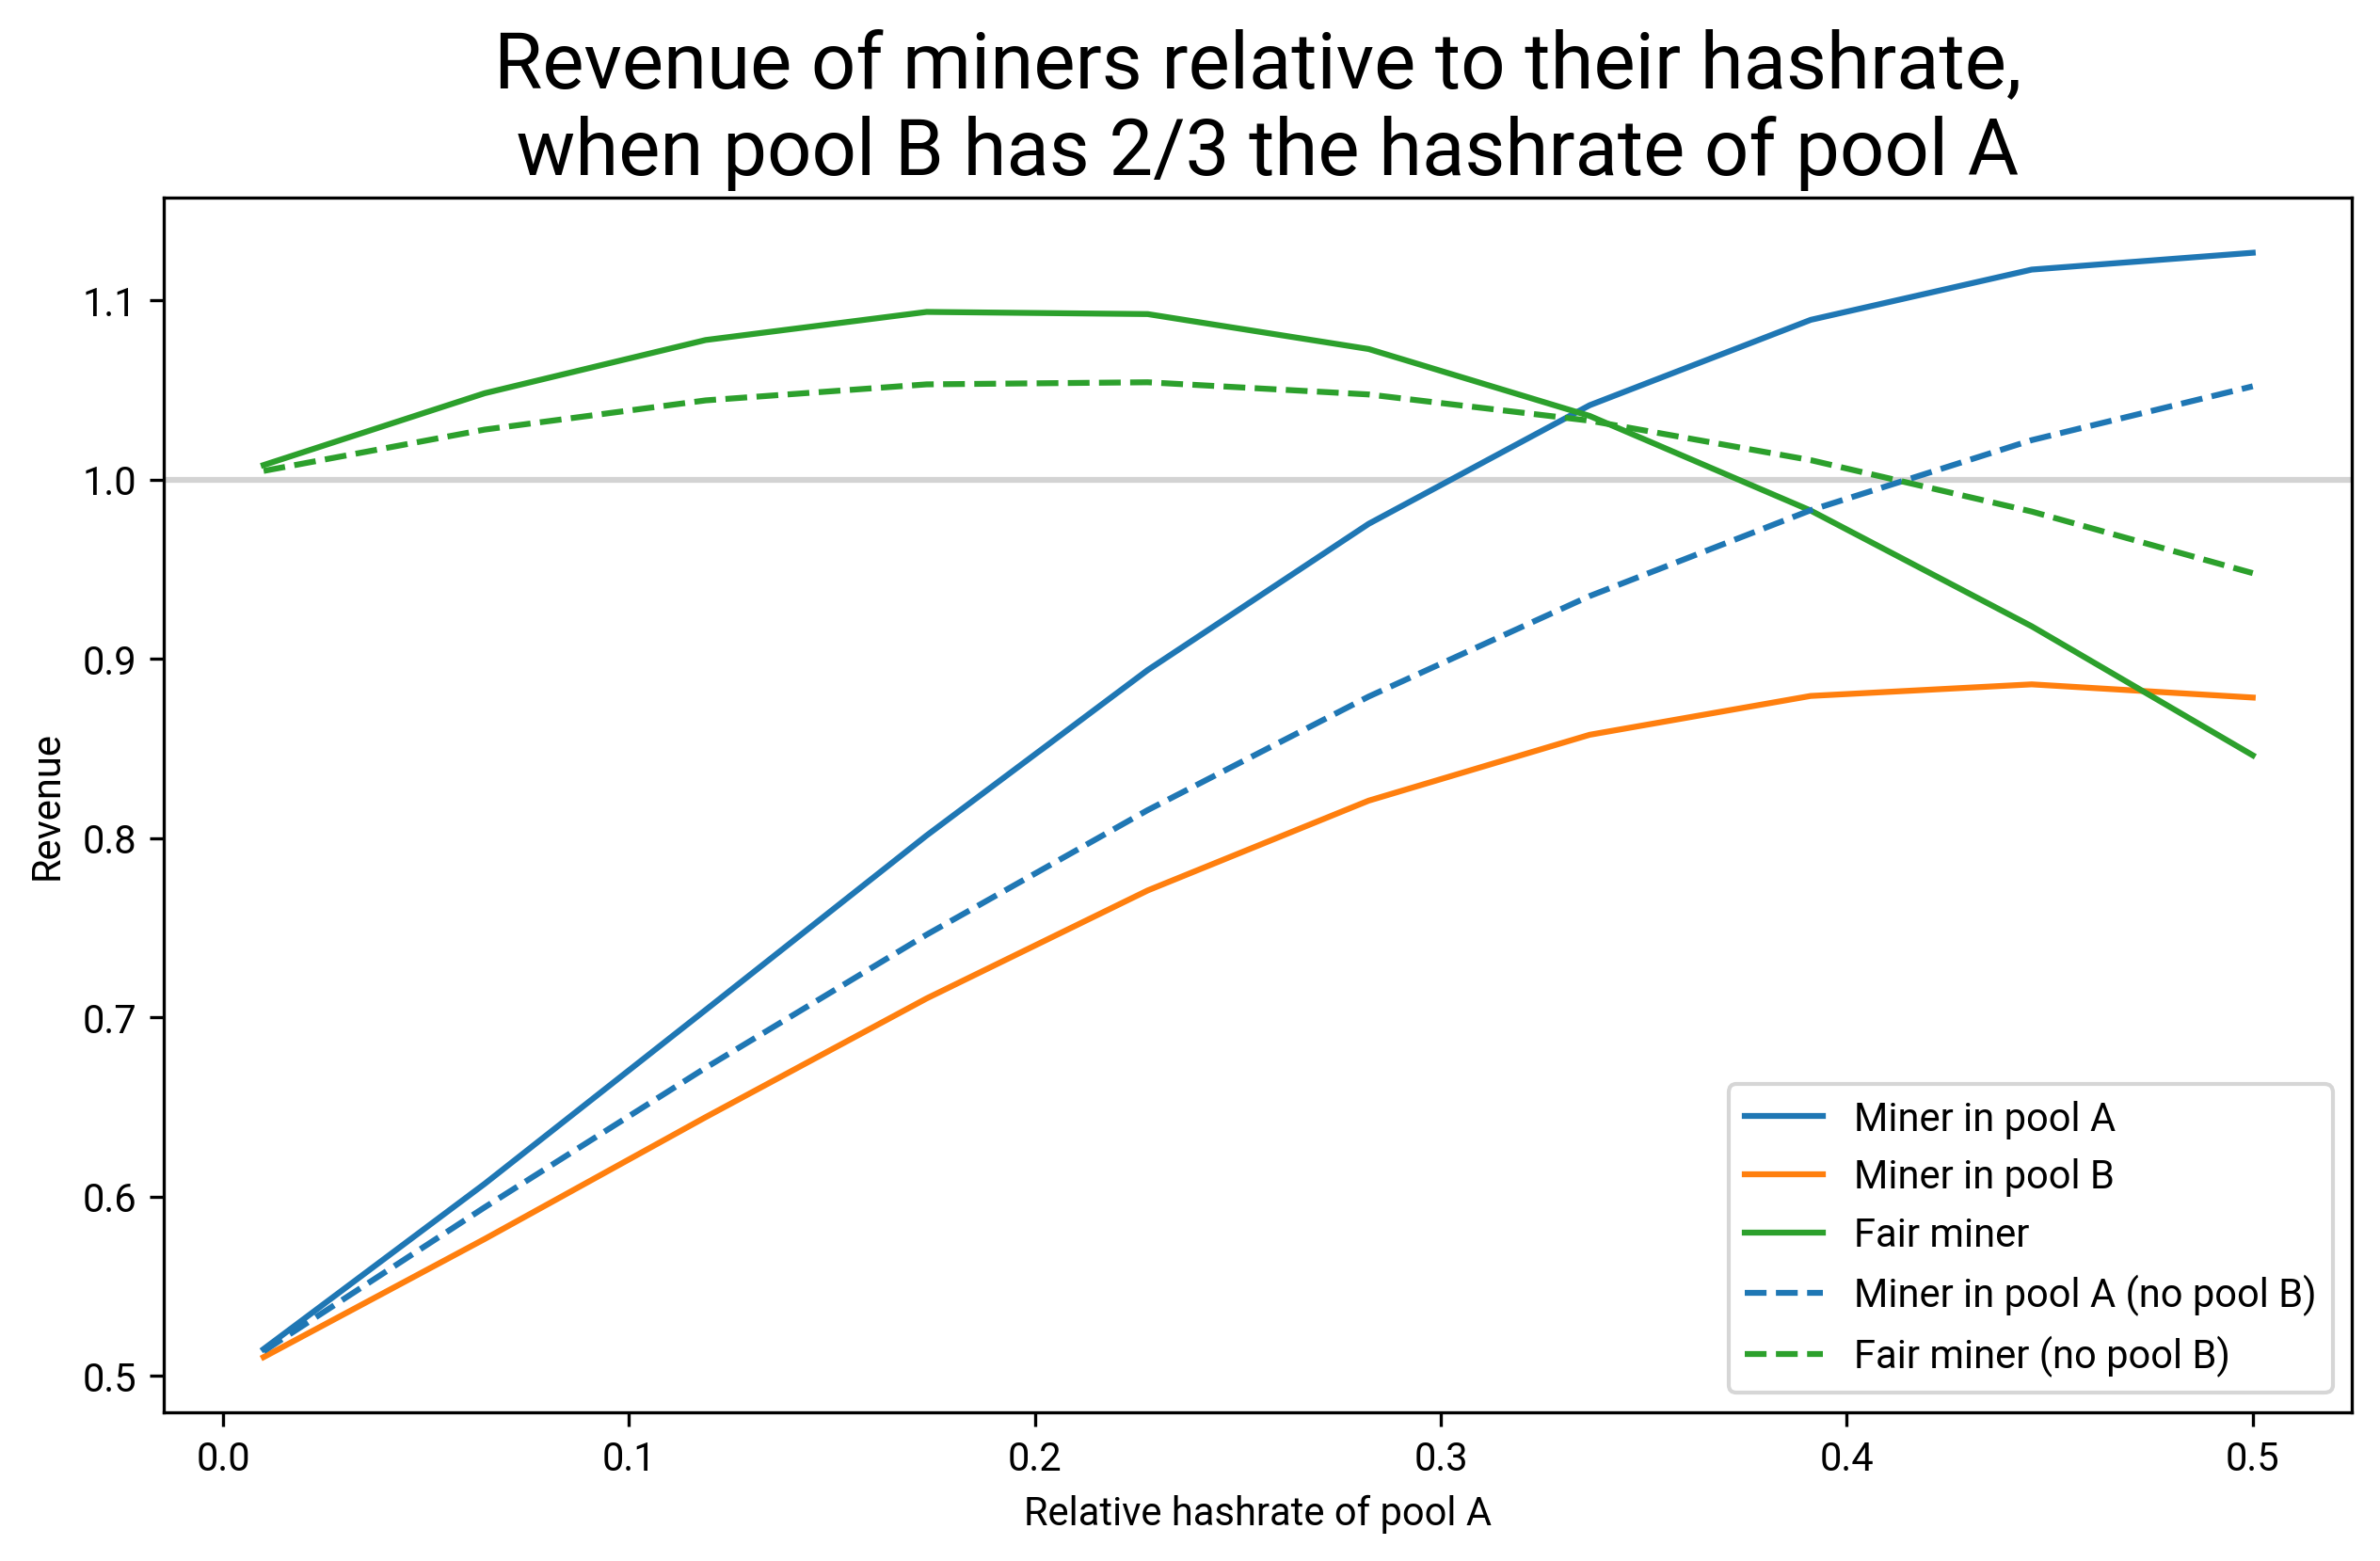

In [70]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax.axhline(y=1, color='lightgray')

ax.plot(x_values, y_values_sa*tot, label='Miner in pool A', color='tab:blue')
ax.plot(x_values, y_values_sb*tot, label='Miner in pool B', color='tab:orange')
ax.plot(x_values, y_values_f*tot, label='Fair miner', color='tab:green')
ax.plot(x_values, y_values_sa_og*tot, label='Miner in pool A (no pool B)', linestyle='--', color='tab:blue')
ax.plot(x_values, y_values_f_og*tot, label='Fair miner (no pool B)', linestyle='--', color='tab:green')


ax.set_title('Revenue of miners relative to their hashrate,\n when pool B has 2/3 the hashrate of pool A', fontsize=20)
ax.set_xlabel('Relative hashrate of pool A')
ax.set_ylabel('Revenue')
ax.legend()

pass